In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/pricing_task

/content/drive/MyDrive/pricing_task


In [ ]:
import pandas as pd
data = pd.read_csv('surely_thats_will_be_enough_for_testing_shap.csv', index_col=0)

In [ ]:
data.describe()

,day,reg_price,promo_price,reg_card_price,check_pos,num_sales,type_loc_id,type_size_id,type_format_id,type_wealth_id,is_store,is_active,is_ex_billa
count,5.000000e+05,235937.0,235937.000000,235937.0,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.0,500000.000000,500000.0
mean,2.019216e+07,0.0,122.964926,0.0,10.360064,1.498468,1.550124,4.860048,1.0,1.523196,1.0,0.977062,0.0
std,1.045863e+04,0.0,230.679199,0.0,10.638748,1.694234,0.497482,2.198567,0.0,0.508652,0.0,0.149706,0.0
min,2.018011e+07,0.0,0.090000,0.0,1.000000,0.024000,1.000000,0.000000,1.0,0.000000,1.0,0.000000,0.0
25%,2.018081e+07,0.0,39.990000,0.0,3.000000,1.000000,1.000000,3.000000,1.0,1.000000,1.0,1.000000,0.0
50%,2.019052e+07,0.0,69.990000,0.0,7.000000,1.000000,2.000000,4.000000,1.0,2.000000,1.0,1.000000,0.0
75%,2.020062e+07,0.0,134.990000,0.0,14.000000,1.704000,2.000000,7.000000,1.0,2.000000,1.0,1.000000,0.0
max,2.021063e+07,0.0,19999.000000,0.0,132.000000,168.000000,2.000000,8.000000,1.0,2.000000,1.0,1.000000,0.0


In [ ]:
data = data.drop(['reg_price', 'reg_card_price'], axis=1)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
X, y = data.fillna(0).drop('num_sales', axis=1), data['num_sales']
features_train, features_eval, target_train, target_eval = train_test_split(X, y, train_size=0.75)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   day             500000 non-null  int64  
 1   shop_id         500000 non-null  object 
 2   sku             500000 non-null  object 
 3   promo_id        500000 non-null  object 
 4   promo_price     500000 non-null  float64
 5   client_id       500000 non-null  object 
 6   check_id        500000 non-null  object 
 7   time            500000 non-null  object 
 8   check_pos       500000 non-null  int64  
 9   region_name     500000 non-null  object 
 10  class           500000 non-null  object 
 11  group           500000 non-null  object 
 12  category        500000 non-null  object 
 13  subcategory     500000 non-null  object 
 14  division_id     500000 non-null  object 
 15  region_id       500000 non-null  object 
 16  city_id         500000 non-null  object 
 17  type_loc_i

In [ ]:
cat_features = ['shop_id', 'sku', 'promo_id', 'client_id', 'check_id', 'region_name', 
                'class', 'group', 'category', 'subcategory', 'division_id', 'region_id', 
                'city_id', 'type_loc_id', 'type_size_id', 'type_format_id', 'type_wealth_id', 'is_store', 'is_active', 'is_ex_billa', 'time']

In [ ]:
X.head(3)

,day,shop_id,sku,promo_id,promo_price,client_id,check_id,time,check_pos,region_name,...,division_id,region_id,city_id,type_loc_id,type_size_id,type_format_id,type_wealth_id,is_store,is_active,is_ex_billa
0,20191017,d2ac32e14d651b9ed03f26f845a11597,98f463552b07d49686c8be996251c778,7215ee9c7d9dc229d2921a40e899ec5f,0.0,644474c3d41185fa4c4f427095954f06,f0478c7f392532b5b9843e144a31cb78,14:35:26,4,7e35e74e610188414ad24235dd787c78,...,e4da3b7fbbce2345d7772b0674a318d5,44f683a84163b3523afe57c2e008bc8c,b8c37e33defde51cf91e1e03e51657da,2,6,1,1,1,1,0
1,20191017,d2ac32e14d651b9ed03f26f845a11597,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,0.0,644474c3d41185fa4c4f427095954f06,f0478c7f392532b5b9843e144a31cb78,14:35:26,1,7e35e74e610188414ad24235dd787c78,...,e4da3b7fbbce2345d7772b0674a318d5,44f683a84163b3523afe57c2e008bc8c,b8c37e33defde51cf91e1e03e51657da,2,6,1,1,1,1,0
2,20191017,d2ac32e14d651b9ed03f26f845a11597,16b4bff70d409ddb77c8107a528cf94b,7215ee9c7d9dc229d2921a40e899ec5f,0.0,644474c3d41185fa4c4f427095954f06,f0478c7f392532b5b9843e144a31cb78,14:35:26,8,7e35e74e610188414ad24235dd787c78,...,e4da3b7fbbce2345d7772b0674a318d5,44f683a84163b3523afe57c2e008bc8c,b8c37e33defde51cf91e1e03e51657da,2,6,1,1,1,1,0


In [ ]:
from catboost import CatBoostClassifier, Pool

pool_train = Pool(
    data=features_train,
    label=target_train,
    cat_features=cat_features
)
pool_eval = Pool(
    data=features_eval,
    label=target_eval,
    cat_features=cat_features
)

In [ ]:
from catboost import CatBoostRegressor
import numpy as np
class WAPE(object):
  def calc_ders_range(self, approxes, targets, weights):
    y_true, y_pred = targets, approxes
    return np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true))

model = CatBoostRegressor(task_type="GPU", iterations=10000)

model.fit(pool_train,
    eval_set=pool_eval, verbose=500)


Learning rate set to 0.061109
0:	learn: 1.7203524	test: 1.5679446	best: 1.5679446 (0)	total: 150ms	remaining: 24m 57s
500:	learn: 1.4802726	test: 1.3495868	best: 1.3495704 (498)	total: 31s	remaining: 9m 48s
1000:	learn: 1.4376922	test: 1.3325945	best: 1.3325945 (1000)	total: 56.2s	remaining: 8m 24s
1500:	learn: 1.3938685	test: 1.3187286	best: 1.3187286 (1500)	total: 1m 21s	remaining: 7m 40s
2000:	learn: 1.3673895	test: 1.3112430	best: 1.3112430 (2000)	total: 1m 46s	remaining: 7m 7s
2500:	learn: 1.3453493	test: 1.3062252	best: 1.3062252 (2500)	total: 2m 12s	remaining: 6m 38s
3000:	learn: 1.3256624	test: 1.3019181	best: 1.3019135 (2998)	total: 2m 40s	remaining: 6m 15s
3500:	learn: 1.3079943	test: 1.2986715	best: 1.2986715 (3500)	total: 3m 6s	remaining: 5m 46s
4000:	learn: 1.2904404	test: 1.2957853	best: 1.2957105 (3981)	total: 3m 32s	remaining: 5m 18s
4500:	learn: 1.2768844	test: 1.2935917	best: 1.2933844 (4465)	total: 3m 57s	remaining: 4m 50s
5000:	learn: 1.2634661	test: 1.2925223	best:

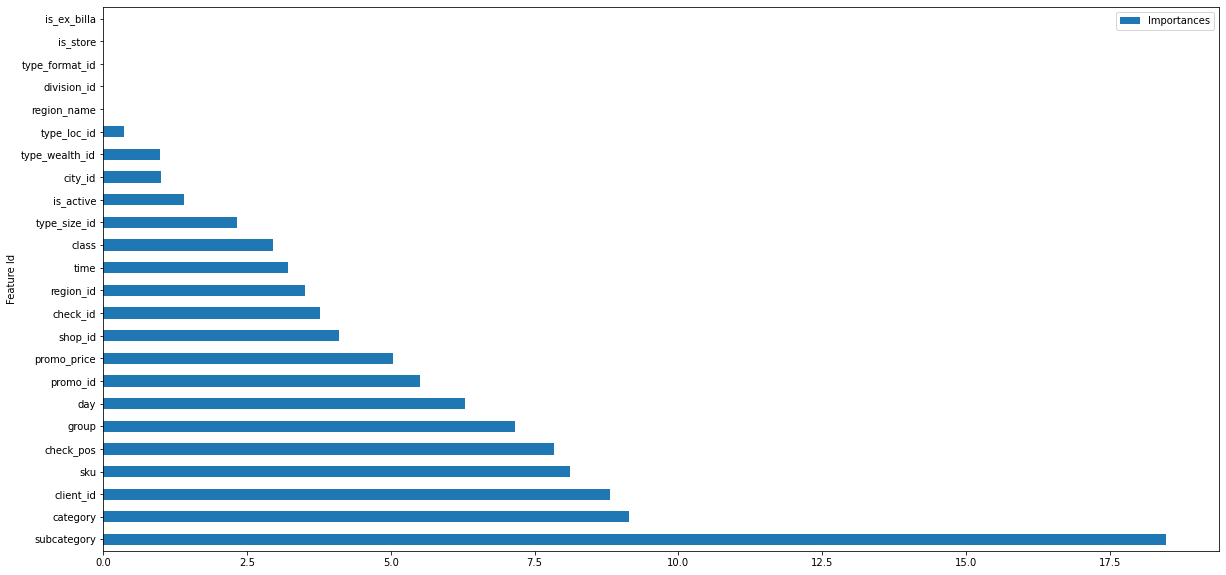

In [ ]:
model.get_feature_importance(prettified=True).plot(x='Feature Id', y='Importances', kind='barh', figsize=(20, 10))

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 11.2 MB/s 


In [ ]:
import shap

explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer(features_train)

Просто хотел показать, что знаю о такой возможности. Сделать то же самое в исходном датасете уже не успеваю

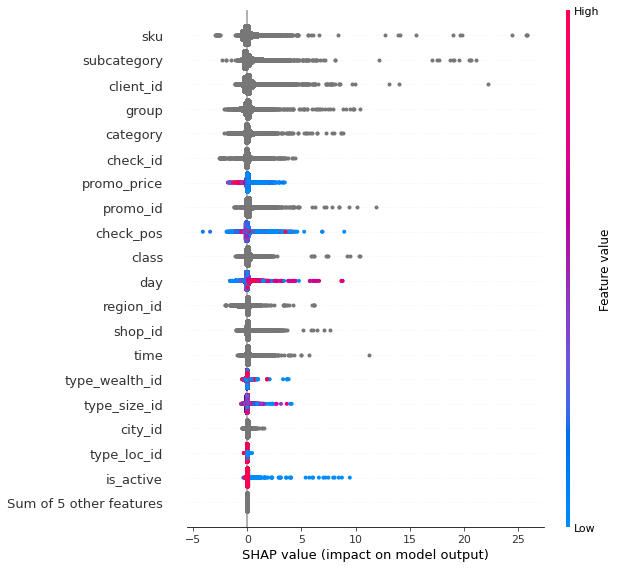

In [ ]:
shap.plots.beeswarm(shap_values, max_display=20)